Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [63]:
NAME = "Theodosis Theodosiou 1278463, u169787"

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

and if you are doing this with someone else (not more than one other person):

COLLABORATORS = "Karl Marx, #student number#"

# exam June 7th, 2018



In the first cell of the notebook, give us your name and student number in the way indicated above. If you do this notebook with --at max.-- one other student, give her/his name and student number as well under "COLLABORATORS".

Fill in the notebook (see below for code cells and text cells that you need to fill in).

If you look at the menus above (File, Edit, View etc.), there is one called "Cell". If you click on this, you can change the "Cell Type". Choose "Code" when you are typing python or R code. Choose "Markdown" when you are typing, well, markdown.

When you finish the notebook, make sure that you **save it with the output of your code included**. 

Then put it on github, e.g. by dragging it onto github (see instructions below). 

Finally, add a link to your README file with the name of this exam: "Exam June 7, 2018".



## price effects of mergers

We consider a merger in this notebook. 

First we calculate the equilibrium with three firms, denoted by 1, 2 and 3. Then firms 2 and 3 merge so that we are left with 2 firms; denoted by 1 and 2.

We calculate the effects of the merger on the equilibrium price.

We start by importing the usual libraries.

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize
%matplotlib inline

The following code helps to calculate the equilibrium for the case with 3 firms. Note that you have seen similar code during the tutorials to calculate the equilibrium with 2 firms.

We assume that before the merger each firm has constant marginal costs equal to 0.3. We assume a simple linear (inverse) demand curve of the form $p=1-Q$ where $p$ denotes price and $Q$ total output on the market. Total output equals the sum of each firm's output: $Q= q_1 + q_2+q_3$.

In [65]:
c0 = 0.3
vector_c = [c0]*3

def p(Q):
    return 1 - Q

def costs(q,c):
    return c*q

def profits(q,Q_other,c):
    return p(q+Q_other)*q-costs(q,c)

def reaction(Q_other,c):
    q1 =  optimize.fminbound(lambda x: -profits(x,Q_other,c),0,1,full_output=1)
    return q1[0]

def fixed_point_three_firms(vector_q,vector_c):
    return [vector_q[0]-reaction(vector_q[1]+vector_q[2],vector_c[0]),
            vector_q[1]-reaction(vector_q[0]+vector_q[2],vector_c[1]),
            vector_q[2]-reaction(vector_q[0]+vector_q[1],vector_c[2])]



#### a) [0.5 points] Show that total equilibrium output equals  0.525. Derive the equilibrium price and Herfindahl index; denote these by `P0` and `H0` resp.

In [66]:
#In the beggining, I calculated the equilibrium output for every company seperately by using fsolve.optimize function: 
initial_guess = [0,0,0]
optimize.fsolve(lambda q: fixed_point_three_firms(q,[0.3,0.3,0.3]), initial_guess)

array([0.175, 0.175, 0.175])

In [67]:
#Then, I added up the quantities of each firm to get total quantity in the industry:
q_1 = 0.175
q_2 = 0.175
q_3 = 0.175
Q = q_1 + q_2 + q_3
print(Q)

0.5249999999999999


In [68]:
#I calculated the equilibrium price by using the formula P = 1 - Q
P0 = 1 - Q
print(P0)

0.4750000000000001


In [69]:
#Herfindahl index:
H0 = (q_1/Q)**2 +(q_2/Q)**2 + (q_3/Q)**2
print(H0)

0.33333333333333337


#### b) [0.5 point] Define a function `fixed_point_two_firms` with the same structure as the function `fixed_point_three_firms` above, except that it derives the equilibrium output levels for a duopoly (two firms). Test this function by showing that each of the two firms produces 0.3333 in case both firms have zero costs.

In [70]:
#I defined the function fixed_point_two_firms by eliminating the return of the 3rd firm in the function fixed_point_three_firms . Because I changed the code I only consider the reaction of one other firm:
def fixed_point_two_firms(vector_q,vector_c):
    return [vector_q[0]-reaction(vector_q[1],vector_c[0]),
            vector_q[1]-reaction(vector_q[0],vector_c[1])]
#I calculated the equilibrium output of two firms with zero costs by using optimize.fsolve:
initial_guess = [0,0]
optimize.fsolve(lambda q: fixed_point_two_firms(q,[0.0,0.0]), initial_guess)


array([0.33333333, 0.33333333])

The Dutch competition authority, ACM, is asked to evaluate the effects of a merger between firms 2 and 3. Firms 2 and 3 claim that by merging they can reduce their constant marginal costs. But it is not clear by how much they will reduce their costs.

The ACM assumes that the marginal cost level of the merged firm is uniformly distributed between 0 and the current marginal cost level `c0`. The merger will not affect the marginal cost level of firm 1 who does not merge. Firm 1's cost level remains `c0`.

The next cell generates a vector of cost levels for the merged firm, denoted `c_after_merger`. Evaluate "c_after_merger" in a separate cell if you do not understand the command that defines it.

Then it calculates the equilibrium output levels for (the non-merging) firm 1 and (the merged) firm 2.

Note that you need to specify `initial_guess`.


In [71]:
c_after_merger = np.random.uniform(0,c0,size = 100)

q1_after_merger = [optimize.fsolve(lambda q: fixed_point_two_firms(q,[c0,c]), initial_guess)[0] for c in c_after_merger]
q2_after_merger = [optimize.fsolve(lambda q: fixed_point_two_firms(q,[c0,c]), initial_guess)[1] for c in c_after_merger]




#### c) [0.5 points] Create a dataframe called `df_after_merger` with three columns: `c_merged_firm`, `output_non_merging_firm`, `output_merged_firm` containing resp. the cost level of the merged firm, the output level of firm 1 and the output level of firm 2.

In [72]:
#Intro of the starting point:
initial_guess = [0,0,0]

# I created the names of the columns:
columns = ['c_merged_firm', 'output_non_merging_firm', 'output_merged_firm']

#i made the function describes the dataframe:
df_after_merger = pd.DataFrame(columns=columns)

c_after_merger = np.arange(0, 0.51, 0.01)

for i in range(0,50):
    df_after_merger.loc[i] = [c_after_merger[i], q1_after_merger[i], q2_after_merger[i]]


#First 50 values of the dataframe:
df_after_merger.head(50)


,c_merged_firm,output_non_merging_firm,output_merged_firm
0,0.00,0.174487,0.351027
1,0.01,0.149858,0.400284
2,0.02,0.137935,0.424130
3,0.03,0.133919,0.432162
4,0.04,0.230168,0.239664
5,0.05,0.232216,0.235567
6,0.06,0.140905,0.418190
7,0.07,0.181788,0.336423
8,0.08,0.179788,0.340424
9,0.09,0.229472,0.241056


#### d) [0.5 points] Add three columns to the dataframe with resp. total equilibrium output on the market, `Q`, equilibrium price, `P` and the Herfindahl index, `H`.

In [73]:
#In order to add new columns to the dataframe I used the same frame as for part (c) and just added new columns  :
initial_guess = [0,0,0]
columns = ['c_merged_firm', 'output_non_merging_firm', 'output_merged_firm', 'Q', 'P', 'H']
df_after_merger = pd.DataFrame(columns=columns)

c_after_merger = np.arange(0, 0.51, 0.01)

for i in range(0,50):
    df_after_merger.loc[i] = [c_after_merger[i], q1_after_merger[i], q2_after_merger[i], (q1_after_merger[i]+q2_after_merger[i]), (1-(q1_after_merger[i]+q2_after_merger[i])), 
                             ((q1_after_merger[i]/(q1_after_merger[i]+q2_after_merger[i]))**2 + (q1_after_merger[i]/(q2_after_merger[i]+q2_after_merger[i]))**2 )]


df_after_merger.head(50)



,c_merged_firm,output_non_merging_firm,output_merged_firm,Q,P,H
0,0.00,0.174487,0.351027,0.525513,0.474487,0.172016
1,0.01,0.149858,0.400284,0.550142,0.449858,0.109241
2,0.02,0.137935,0.424130,0.562065,0.437935,0.086667
3,0.03,0.133919,0.432162,0.566081,0.433919,0.079973
4,0.04,0.230168,0.239664,0.469832,0.530168,0.470578
5,0.05,0.232216,0.235567,0.467784,0.532216,0.489369
6,0.06,0.140905,0.418190,0.559095,0.440905,0.091898
7,0.07,0.181788,0.336423,0.518212,0.481788,0.196056
8,0.08,0.179788,0.340424,0.520212,0.479788,0.189173
9,0.09,0.229472,0.241056,0.470528,0.529472,0.464390


#### e) [0.5 points] Make a histogram of the equilibrium price `P` after the merger. Also indicate in the histogram the equilibrium price before the merger `P0`. Label the horizontal axis with $P$.

[hint: you may want to use matplotlib's `hist`, `vlines` and `legend` to make this graph (e.g use google to find these functions); but feel free to use something else]

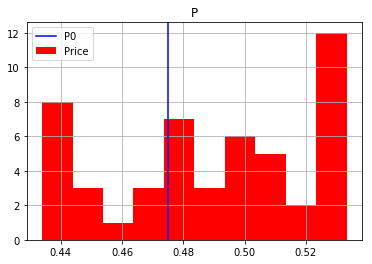

In [74]:
import numpy as np
import math
import matplotlib.pyplot as plt
#We used Matplotlib to create the histogram
df_after_merger.hist(column = 'P', color='red', label ='Price')
plt.axvline(P0, c='blue', label='P0')
plt.legend()
plt.show()

#### f) [0.5 points] Explain why sometimes the equilibrium price after the merger exceeds the equilibrium price before the merger and sometimes it is lower than the pre-merger price. [hint: there is a trade off between two effects, depending on which effect dominates, equilibrium price increases or decreases after the merger]

The equilibrium price changes because the quantity changes.The two companies merged, reducing the competition by a third. As a result,the prices will be higher when the merged firms produce less output.

#### g) [0.5 points] Make a graph with the Herfindahl index on the horizontal axis and the equilibrium price on the vertical axis. This is straightforward for $(H,P)$ after the merger as both values are in the dataframe. Add in another color, the pre-merger combination `(H0,P0)` that we calculated above.

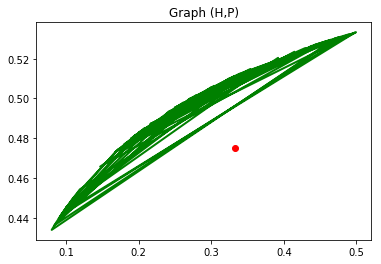

In [75]:
#The pre merger combination (H,P) is the red dot
plt.figure(1)
plt.title("Graph (H,P)")
plt.plot(df_after_merger.H,df_after_merger.P,color = "green",linewidth = 2)
plt.plot(H0,P0,"ro")

plt.show()

#### h) [0.5 points] Use the graph under g) to discuss the relation between the Herfindahl index and the equilibrium price. To illustrate, some people think that lower values of the Herfindahl index are associated with more competitive outcome. Would you agree with this?

The Herfindahl index and Price are positively correlated

## Github

After you have finished, we need to upload this notebook on github. Make sure that you upload the file on the github page of each collaborator.

Instructions on how to upload this on github can be found [on this page](http://janboone.github.io/programming-for-economists/github.html). This page has two screencasts: one shows how to drag the notebook onto your github page, the other shows how you can use the command line to upload your notebook.


Remember to update the README file in your repository to include a link to this notebook on github.


The links that you should post start with “github.com/” and are NOT of the form “http://localhost”. Make sure you test your links after uploading.